Zadanie rekrutacyjne - Kogo powinniśmy zatrzymać w naszej firmie? <br>
Igor Szafarowicz <br>
Natalia Możdżeń

In [44]:
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [45]:
data = pd.read_csv('C:/Users/igors/Desktop/Attrition_dataset.csv', sep=';', 
                   parse_dates=['MMM.YY', 'Dateofjoining', 'LastWorkingDate'])

In [46]:
data

,Emp_ID,MMM.YY,Age,Salary,LastWorkingDate,Designation,Total.Business.Value,Quarterly.Rating,Gender,City,Education_Level,Dateofjoining,Joining.Designation
0,1,2016-01-01,28,"57387,00 USD",NaT,1,2381060,2,Male,C23,MASTER,2015-12-24,1
1,1,2016-01-02,28,"57387,00 USD",NaT,1,-665480,2,Male,C23,MASTER,2015-12-24,1
2,1,2016-01-03,28,"57387,00 USD",2016-11-03,1,0,2,Male,C23,MASTER,2015-12-24,1
3,2,2017-01-11,31,"67016,00 USD",NaT,2,0,1,Male,C7,Master,2017-06-11,2
4,2,2017-01-12,31,"67016,00 USD",NaT,2,0,1,Male,C7,Master,2017-06-11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,2044,2017-01-03,34,"38619,00 USD",2017-03-23,2,0,1,Male,C20,Colege,2016-11-15,2
19186,2651,2017-01-08,34,"62292,00 USD",2017-07-29,2,180000,1,Male,C11,Master,2016-06-27,2
19187,1864,2016-01-01,32,"85688,00 USD",NaT,3,3414220,3,Female,C29,Bachelor,2011-11-08,1
19188,2422,2016-01-05,47,"111507,00 USD",NaT,4,202400,2,Male,C4,Bachelor's,2011-08-26,2


Zanim przejdziemy do znajdowania pracowników, na których dział HR powinien zwrócić szczególną uwagę, należy wyczyścić dane.

In [47]:
# Data cleaning
data['Salary'] = [x.replace(',00 USD', '') for x in data['Salary']]
data['Salary'] = data['Salary'].astype('int64', copy=False)
data['Education_Level'] = data['Education_Level'].map({'Colege':'College', 'MASTER':'Master', "Bachelor's":'Bachelor',
                            'College':'College', 'Master':'Master', 'Bachelor':'Bachelor'})

Ze zbioru danych przede wszystkim postanowiliśmy usunąć wszystkich pracowników, którzy w firmie już nie pracują.

In [48]:
not_working = data[data['LastWorkingDate'].notnull()]
not_working_id = not_working['Emp_ID'].tolist()
working = data[pd.isna(data['LastWorkingDate'])]

for i, row in working.iterrows():
    if row['Emp_ID'] in not_working_id:
        working.drop(index=i, inplace=True)
working.drop(columns='LastWorkingDate', inplace=True)

working

,Emp_ID,MMM.YY,Age,Salary,Designation,Total.Business.Value,Quarterly.Rating,Gender,City,Education_Level,Dateofjoining,Joining.Designation
3,2,2017-01-11,31,67016,2,0,1,Male,C7,Master,2017-06-11,2
4,2,2017-01-12,31,67016,2,0,1,Male,C7,Master,2017-06-11,2
13,6,2017-01-08,31,78728,3,0,1,Female,C11,Bachelor,2017-07-31,3
14,6,2017-01-09,31,78728,3,0,1,Female,C11,Bachelor,2017-07-31,3
15,6,2017-01-10,31,78728,3,0,2,Female,C11,Bachelor,2017-07-31,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19180,1606,2016-01-09,43,99127,3,1903060,4,Female,C12,Bachelor,2011-08-22,1
19181,569,2016-01-10,39,111743,3,172000,3,Female,C26,College,2012-12-31,2
19183,2070,2017-01-05,32,75875,3,0,1,Male,C6,College,2012-01-30,2
19187,1864,2016-01-01,32,85688,3,3414220,3,Female,C29,Bachelor,2011-11-08,1


Następnie łączymy rekordy z różnych miesięcy w jeden, oraz ustawiamy Emp_ID jako indeks

In [49]:
working = working.drop_duplicates(subset='Emp_ID')
working.set_index('Emp_ID', inplace=True)

In [50]:
working.head()

,MMM.YY,Age,Salary,Designation,Total.Business.Value,Quarterly.Rating,Gender,City,Education_Level,Dateofjoining,Joining.Designation
Emp_ID,,,,,,,,,,,
2,2017-01-11,31,67016,2,0,1,Male,C7,Master,2017-06-11,2
6,2017-01-08,31,78728,3,0,1,Female,C11,Bachelor,2017-07-31,3
11,2017-01-12,28,42172,1,0,1,Female,C19,Master,2017-07-12,1
14,2017-01-10,39,19734,3,0,1,Female,C26,College,2017-10-16,3
25,2016-01-01,29,102077,3,2552300,3,Male,C24,Bachelor,2014-10-30,1


Na których pracowników dział HR powinien zwrócić uwagę? <br>
Zaczniemy od sprawdzenia, czy ocena kwartalna pokrywa się w pensją pracowników.

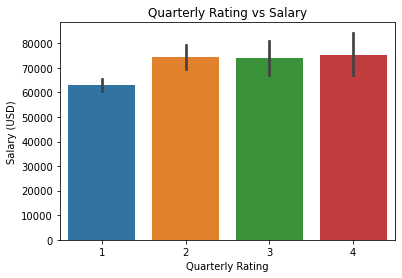

In [57]:
sns.barplot(x='Quarterly.Rating', y='Salary', data=working)
plt.xlabel('Quarterly Rating')
plt.ylabel('Salary (USD)')
plt.title('Quarterly Rating vs Salary')
plt.show()

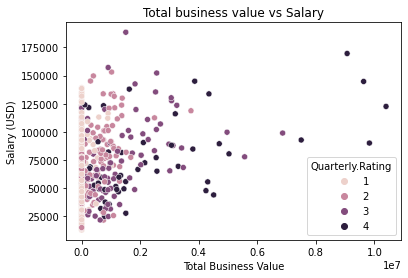

In [56]:
sns.scatterplot(x='Total.Business.Value', y='Salary', hue='Quarterly.Rating', data=working)
plt.xlabel('Total Business Value')
plt.ylabel('Salary (USD)')
plt.title('Total business value vs Salary')
plt.show()

Jak widać, pracownicy z oceną 2 zarabiają niewiele mniej od tych z oceną 3 i 4. <br>
Wobec tego postanowiliśmy, że największe szansę na odejście mają: <br>
-Młodzi pracownicy (poniżej 35 roku życia) <br>
-Przynoszący duże zyski (powyżej 3 000 000) <br>
-Z wysoką oceną (3 lub 4) <br>
-Zarabiający stosunkowo mało (poniżej 100 000)

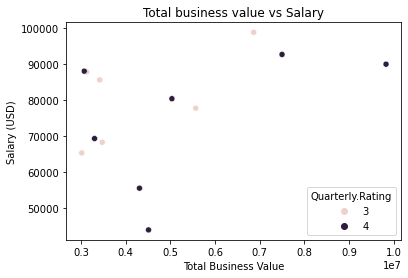

In [59]:
can_leave = working.loc[working['Total.Business.Value'] > 3000000].loc[working['Salary'] < 100000].loc[working['Age'] < 36]
sns.scatterplot(x='Total.Business.Value', y='Salary', hue='Quarterly.Rating', data=can_leave)
plt.xlabel('Total Business Value')
plt.ylabel('Salary (USD)')
plt.title('Total business value vs Salary')
plt.show()

In [60]:
can_leave

,MMM.YY,Age,Salary,Designation,Total.Business.Value,Quarterly.Rating,Gender,City,Education_Level,Dateofjoining,Joining.Designation
Emp_ID,,,,,,,,,,,
199,2016-01-01,29,87902,3,3121010,3,Male,C14,College,2013-12-16,1
434,2016-01-01,28,80469,2,5033020,4,Female,C6,Master,2014-11-08,1
448,2016-01-01,35,65389,4,3011170,3,Male,C10,Bachelor,2011-04-04,2
568,2016-01-01,31,55600,3,4306190,4,Male,C16,Bachelor,2015-05-21,1
713,2016-01-01,27,69388,2,3299470,4,Male,C12,College,2015-01-30,1
954,2016-01-01,29,43996,2,4508870,4,Male,C13,College,2011-08-29,1
1093,2016-01-01,35,77831,3,5567290,3,Male,C1,Bachelor,2012-07-23,1
1374,2016-01-01,32,88121,2,3069200,4,Male,C5,Bachelor,2015-09-06,1
1864,2016-01-01,32,85688,3,3414220,3,Female,C29,Bachelor,2011-11-08,1


Tabela powyżej zawiera pracowników, którzy według nas mogą być zainteresowani odejściem z firmy <br>
Prawie wszystkich tych pracowników łączy niska ocena kwalifikacji podczas rekrutacji, co może sugerować, iż w czasie spędzonym w SKNS Investment Ltd rozwinęli się, a nie otrzymali adekwatnych podwyżek. <br>
Dział HR powinien postarać się, by Ci pracownicy poczuli się docenieni w obecnym miejscu pracy.